# **RESTUARANT REVIEWS**

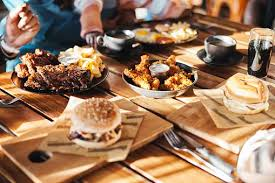

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_table("/content/drive/MyDrive/Restaurant_Reviews.tsv")

In [ ]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df.isna().sum()

,0
Review,0
Liked,0


In [ ]:
df["Liked"].unique()

array([1, 0])

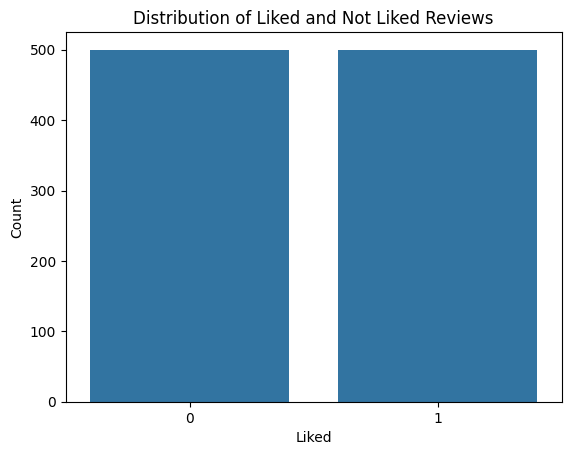

In [ ]:
sns.countplot(x="Liked",data=df)
plt.title("Distribution of Liked and Not Liked Reviews")
plt.xlabel("Liked")
plt.ylabel("Count")
plt.show()

In [ ]:
text=df.Review
text

,Review
0,Wow... Loved this place.
1,Crust is not good.
2,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...
...,...
995,I think food should have flavor and texture an...
996,Appetite instantly gone.
997,Overall I was not impressed and would not go b...
998,"The whole experience was underwhelming, and I ..."


**Removing special character**

In [ ]:
text=text.str.replace('[^a-zA-Z0-9 ]',"",regex=True)
text

,Review
0,Wow Loved this place
1,Crust is not good
2,Not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...
...,...
995,I think food should have flavor and texture an...
996,Appetite instantly gone
997,Overall I was not impressed and would not go back
998,The whole experience was underwhelming and I t...


**Stemming/Lematization**

In [ ]:
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
from nltk.tokenize import word_tokenize
text=text.apply(lambda x:[stemmer.stem(token.lower())for token in word_tokenize(x)]).apply(lambda token:" ".join(token))
text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Review
0,wow love thi place
1,crust is not good
2,not tasti and the textur wa just nasti
3,stop by dure the late may bank holiday off ric...
4,the select on the menu wa great and so were th...
...,...
995,i think food should have flavor and textur and...
996,appetit instantli gone
997,overal i wa not impress and would not go back
998,the whole experi wa underwhelm and i think wel...


**Finding stopwords**

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sw=stopwords.words('english')
text=text.apply(lambda x:[i for i in word_tokenize(x) if i not in sw]).apply(lambda x:" ".join(x))
text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Review
0,wow love thi place
1,crust good
2,tasti textur wa nasti
3,stop dure late may bank holiday rick steve rec...
4,select menu wa great price
...,...
995,think food flavor textur lack
996,appetit instantli gone
997,overal wa impress would go back
998,whole experi wa underwhelm think well go ninja...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
data=vectorizer.fit_transform(text)
print(data)

  (0, 1078)	0.35722411024466283
  (0, 1434)	0.33347211132125154
  (0, 843)	0.48657099908439444
  (0, 1616)	0.7241795004561161
  (1, 625)	0.44530826402032975
  (1, 353)	0.895377322694293
  (2, 947)	0.5954645145987963
  (2, 1549)	0.21366649689542602
  (2, 1427)	0.5954645145987963
  (2, 1415)	0.49516729679137395
  (3, 1165)	0.24427668613454612
  (3, 1357)	0.3550549126263005
  (3, 1198)	0.3550549126263005
  (3, 703)	0.3550549126263005
  (3, 117)	0.3550549126263005
  (3, 876)	0.30099602918167917
  (3, 805)	0.33510338719174226
  (3, 451)	0.30099602918167917
  (3, 1364)	0.3099674378304166
  (3, 843)	0.2156423541469455
  (4, 1113)	0.4871283579988345
  (4, 638)	0.37758923529466704
  (4, 897)	0.5131979657630731
  (4, 1255)	0.5484159398925638
  (4, 1549)	0.23664348085537362
  :	:
  (997, 1612)	0.4165290633650498
  (997, 1549)	0.2146554468163993
  (998, 963)	0.4086620303266741
  (998, 1587)	0.38569817149173824
  (998, 1401)	0.2984537656084812
  (998, 958)	0.3071842195490907
  (998, 504)	0.27548990

In [ ]:
data.shape

(1000, 1636)

In [ ]:
X=data.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y=df["Liked"]
y

,Liked
0,1
1,0
2,0
3,1
4,1
...,...
995,0
996,0
997,0
998,0


**Train Test split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

**Model Building**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       108
           1       0.73      0.83      0.78        92

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.79      0.78      0.78       200

accuracy 78.0
DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       108
           1       0.73      0.70      0.71        92

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200

accuracy 74.0
RandomForestClassifier(random_state=42)
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       108
           1       0.77      0.70      0.73        92

    accuracy                           0.77       200
   macro avg

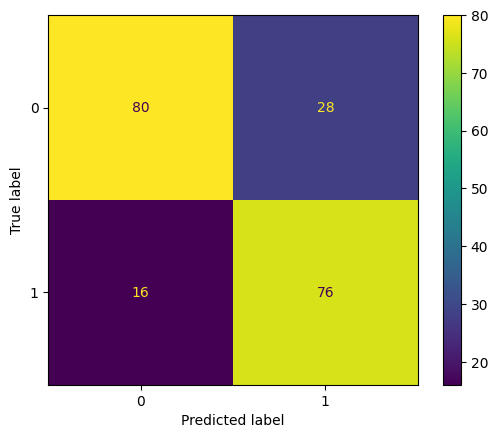

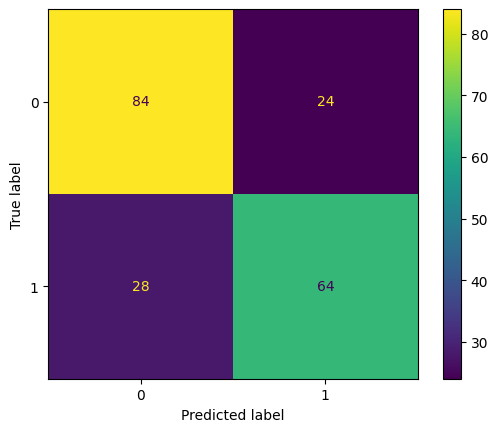

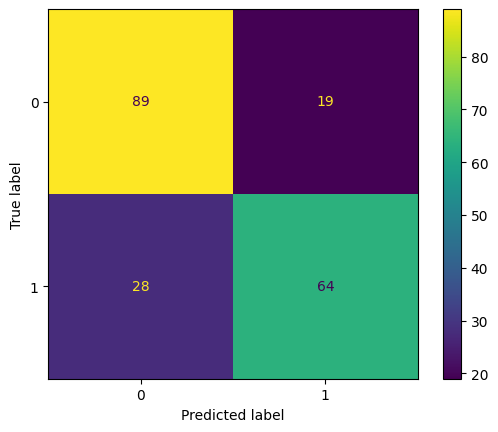

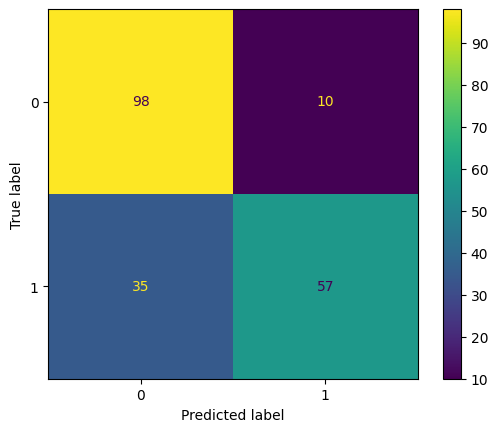

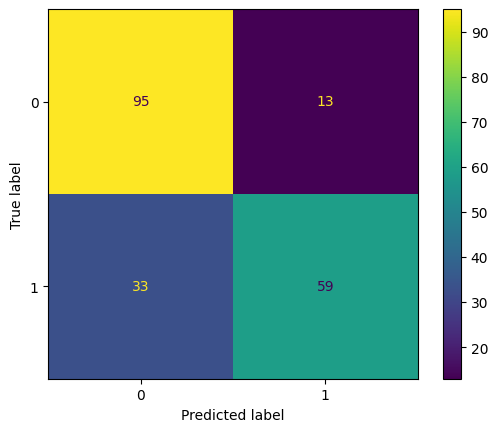

In [ ]:
knn=KNeighborsClassifier()
sv=SVC()
nb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(random_state=42)
gb=GradientBoostingClassifier()
ad=AdaBoostClassifier()
xg=XGBClassifier()
model=[knn,dt,rf,gb,ad]
for select in model:
  print(select)
  select.fit(X_train,y_train)
  y_pred=select.predict(X_test)
  y_pred
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print("accuracy",accuracy_score(y_test,y_pred)*100)


**Prediction**

In [ ]:
y_new=knn.predict(vectorizer.transform([" Restaurant Chef Pillai stands out for its warm and inviting ambiance, with guests frequently praising the cozy atmosphere set by the soft lighting and soothing background music. The fusion of traditional Kerala flavors with a contemporary twist has been a culinary delight for patrons, who particularly recommend the generous Feast Menu despite some noting variability in value."]))
print(y_new)
if y_new==1:
    print("Liked")
elif y_new==0:
    print("Disliked")


[1]
Liked


In [ ]:
y_new=select.predict(vectorizer.transform([" Restaurant Chef Pillai stands out for its warm and inviting ambiance, with guests frequently praising the cozy atmosphere set by the soft lighting and soothing background music. The fusion of traditional Kerala flavors with a contemporary twist has been a culinary delight for patrons, who particularly recommend the generous Feast Menu despite some noting variability in value."]))
print(y_new)
if y_new==1:
    print("Liked")
elif y_new==0:
    print("Disliked")

[1]
Liked


**WordCloud**

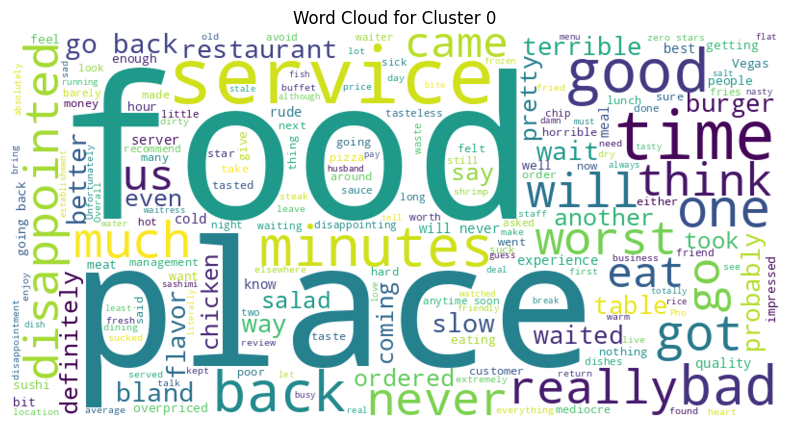

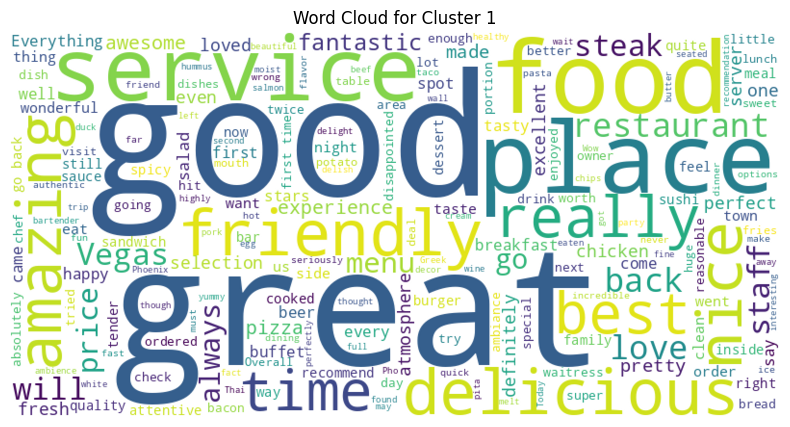

In [ ]:
from wordcloud import WordCloud
num_clusters=2
for cluster_num in range(num_clusters):
    cluster_text = " ".join(df.loc[df['Liked'] == cluster_num]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)

    # Plot the word cloudo
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='mitchell')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_num}')
    plt.show()